# Introduction

What we will cover:

0. End to end Scikit-Learn workflow
1. Preparing the data
2. Choosing the right algorithm (estimator)
3. Fit the algorithm and use it to make predictions on our data
4. Evaluating the model
5. Improving the model
6. Saving and loading the model
7. Put all the above togethor in a practice exercise

## 0. Scikit-learn workflow

In [3]:
# Prepare the data

import pandas as pd

heart_disease_df = pd.read_csv("heart-disease.csv")
heart_disease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
# Create X (features matrix)

X = heart_disease_df.drop("target", axis=1)

# Create Y (label matrix)

y = heart_disease_df["target"]

In [11]:
# Choose the right model and hyperparameters

"""
we want a model that predicts whether a patient may have heart_disease or not

therefore this is a classification problem.

"""

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# we will keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [12]:
# Fit the model to the training data

from sklearn.model_selection import train_test_split

# split the data

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

# find the patterns in the training data set

clf.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
# make a prediction

y_preds = clf.predict(X_test)
y_preds

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [14]:
y_test

4      1
82     1
19     1
177    0
280    0
      ..
134    1
13     1
228    0
266    0
96     1
Name: target, Length: 61, dtype: int64

In [16]:
# evaluate the model based on the training data and test data

clf.score(X_train, y_train) # accuracy

# 1.0 is the best possible score a model can get

1.0

In [19]:
# our model got 100% bcz it used the training set to learn.
# therefore when we evaluate it using the same set, it passes with flying colors

In [17]:
clf.score(X_test, y_test)

0.8360655737704918

In [ ]:
# now when we evaluate the model using data it has never seen before (test set)
# it gets 83% accuracy 

In [18]:
# more ways of evaluating the model

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [20]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77        23
           1       0.85      0.89      0.87        38

    accuracy                           0.84        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.84      0.83        61



In [21]:
confusion_matrix(y_test, y_preds)

array([[17,  6],
       [ 4, 34]], dtype=int64)

In [22]:
accuracy_score(y_test, y_preds)

0.8360655737704918

In [28]:
# improve the model

# we can try change some hyperparameters e.g n_estimators
import numpy as np

np.random.seed(7)

for num in range(10, 100, 10):
    print(f"Trying to fit model with {num} estimators")
    # train
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    
    # evaluate
    accuracy = model.score(X_test, y_test) * 100
    print(f"{accuracy:.2f}%")
    print("_"*20 + "\n")

Trying to fit model with 10 estimators
83.61%
____________________

Trying to fit model with 20 estimators
85.25%
____________________

Trying to fit model with 30 estimators
83.61%
____________________

Trying to fit model with 40 estimators
78.69%
____________________

Trying to fit model with 50 estimators
81.97%
____________________

Trying to fit model with 60 estimators
80.33%
____________________

Trying to fit model with 70 estimators
80.33%
____________________

Trying to fit model with 80 estimators
81.97%
____________________

Trying to fit model with 90 estimators
85.25%
____________________



In [29]:
# save model

import pickle

pickle.dump(model, open("random_forest_model_1.pkl", mode="wb"))

In [30]:
# load model

loaded_model = pickle.load(open("random_forest_model_1.pkl", mode="rb"))

loaded_model.score(X_test, y_test)

0.8524590163934426

## 1. Preparing our data

It usually involves 3 steps:
1. Split data into features (X) and labels (y)
2. Filling (aka imputing) or disregarding missing values
3. Converting non-numerical values into numeric values (aka feature encoding)

**NB:** 

Whenever we are working with data, we have to do consider the following principles:
* Clean - remove / replace missing data; convert to similar units
* Transform - non numeric to numeric eg colours, pics, audio
* Reduce - drop irrelevant columns, sum up columns etc
    

In [5]:
X = heart_disease_df.drop("target", axis=1)
y = heart_disease_df["target"]

X.shape, y.shape

((303, 13), (303,))

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Converting data to numbers

We want to create a model that predicts the price of a car (regression problem)

It is important to note that the features existing in the data set are not enough to create an accurate real world model.

In [7]:
car_sales_df = pd.read_csv("car-sales-extended.csv")
len(car_sales_df)

1000

In [8]:
car_sales_df.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

Notice that **"Make"** and **"Colour"** are of type **"object"** i.e strings. We need to convert them to numbers

In [9]:
car_sales_df["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

Notice how the data has cars with only 3, 4 or 5 doors. Therefore we can consider **Doors** as a **categorical_feature**

The other **categorical_features** are "Make" and "Colour"

We now need to convert these categories into numbers

In [15]:
X = car_sales_df.drop("Price", axis=1)
y = car_sales_df["Price"]

car_sales_df.shape, X.shape, y.shape

((1000, 5), (1000, 4), (1000,))

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [14]:
categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()

 # transformer params - list of tuples, remainder
transformer = ColumnTransformer([("one_hot",     
                                   one_hot,
                                   categorical_features)],
                                remainder="passthrough")

transformed_X = transformer.fit_transform(X)

pd.DataFrame(transformed_X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [16]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


![](one-hot-encoding.png)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, 
                                                    y, 
                                                    test_size=0.2)

In [20]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.11029009496783837

Notice that our model has 11% accuracy. Very poor. This is because the data set we used does not have enough features to create relaible patterns from

### Filling missing Data using Pandas

General strategy:
- Fill them with some value (also known as imputation).
- Remove the samples with missing data altogether

In [4]:
df = pd.read_csv("car-sales-extended-missing-data.csv")

In [5]:
# check which columns have missing values

df.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [6]:
# Fill the missing data for Make, Colour with "missing"

df["Make"].fillna("missing", inplace=True)
df["Colour"].fillna("missing", inplace=True)

In [7]:
df.isna().sum()

Make              0
Colour            0
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [8]:
# Fill missing data for Odometer with mean

odometer_mean = df["Odometer (KM)"].mean()

df["Odometer (KM)"].fillna(odometer_mean, inplace=True)

In [9]:
df.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors            50
Price            50
dtype: int64

In [10]:
df["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [11]:
# Most car samples have 4 doors, so we will fill the missing ones with 4

df["Doors"].fillna(4, inplace=True)

In [12]:
df.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

Since **Price** is a **label**, we should not fill in the missing values with anything. We will just drop all the rows with missing Price

In [14]:
df.dropna(inplace=True)

In [15]:
df.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

### Feature Scaling

I was recently working with a dataset from an ML Course that had multiple features spanning varying degrees of magnitude, range, and units. This is a significant obstacle as a few machine learning algorithms are highly sensitive to these features.

I’m sure most of you must have faced this issue in your projects or your learning journey. For example, one feature is entirely in kilograms while the other is in grams, another one is liters, and so on. How can we use these features when they vary so vastly in terms of what they’re presenting?

This is where I turned to the concept of feature scaling in machine learning. It’s a crucial part of the data preprocessing stage but I’ve seen a lot of beginners overlook it (to the detriment of their machine learning model).

Scaling techniques: 
1. **Normalization**
2. **Standardization** 

[Further reading:](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)

### Filling missing data using Scikit Learn

Always keep this in mind:

- Encode and fill your categorical data into numbers (on the whole dataset), if necessary.
- Split your data (into train/test), always keep your training & test data separate.
- Fill/transform the numerical data on the training set and test sets separately.

In [14]:
df = pd.read_csv("car-sales-extended-missing-data.csv")

In [15]:
df.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [16]:
# Drop the rows with no labels ("Price")

df.dropna(subset=["Price"] ,inplace=True)

df.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [17]:
# Split your data into X and y

X = df.drop("Price", axis=1)
y = df["Price"]

# Split X and y into train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [19]:
# Fill in values data usind Scikit-Learn

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean

# for ["Make", "Colour"]
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing") 

 # for Doors
door_imputer = SimpleImputer(strategy="constant", fill_value=4)

# for Odometer
num_imputer = SimpleImputer(strategy="mean")

#Define the columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
                             ("cat_imputer", cat_imputer, cat_features),
                             ("door_imputer", door_imputer, door_feature),
                             ("num_imputer", num_imputer, num_features)
                            ])

# Fill the train and test sets separately

# fit_transform imputes the missing values from the training set and fills them simultaneously
filled_X_train = imputer.fit_transform(X_train) 

# tranform takes the imputing missing values from the training set and fills the test set with them
filled_X_test = imputer.transform(X_test)

In [20]:
filled_X_train

array([['Toyota', 'Blue', 4.0, 85473.0],
       ['Toyota', 'White', 4.0, 109013.0],
       ['Toyota', 'Black', 4.0, 86696.0],
       ...,
       ['Honda', 'Blue', 4.0, 142403.0],
       ['Toyota', 'Black', 4.0, 97042.0],
       ['Honda', 'Blue', 4.0, 152547.0]], dtype=object)

Now we've filled our missing values, let's check how many are missing from each set.

In [21]:
df_filled_X_train = pd.DataFrame(filled_X_train, 
                                 columns=["Make", "Colour", "Doors", "Odometer"])

df_filled_X_train.isna().sum()

Make        0
Colour      0
Doors       0
Odometer    0
dtype: int64

In [22]:
df_filled_X_test = pd.DataFrame(filled_X_test, 
                                 columns=["Make", "Colour", "Doors", "Odometer"])

df_filled_X_test.isna().sum()

Make        0
Colour      0
Doors       0
Odometer    0
dtype: int64

Okay, no missing values but we've still got to turn our data into numbers. Let's do that using one hot encoding.

Again, keeping our training and test data separate.

In [23]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
cat_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()

# define our transformer
transformer = ColumnTransformer([("one_hot", one_hot, cat_features)],
                                remainder="passthrough")

# transform the training and test sets separately
transformed_X_train = transformer.fit_transform(df_filled_X_train)
transformed_X_test = transformer.transform(df_filled_X_test)

transformed_X_train.toarray()

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.54730e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.09013e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.66960e+04],
       ...,
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.42403e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 9.70420e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.52547e+05]])

Wonderful! Now we've filled and transformed our data, ensuring the training and test sets have been kept separate. Let's fit a model to the training set and evaluate it on the test set.

In [27]:
import numpy as np

np.random.seed(7)

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.2564176385397259

## How to choose a model

[cheat sheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

[Sample datasets from Sci-kit Learn](https://scikit-learn.org/stable/datasets.html)

![map](ml_map.png)

Let's use a sample dataset from sci-kit learn

In [42]:
from sklearn.datasets import fetch_california_housing

In [43]:
housing_data = fetch_california_housing()
housing_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [44]:
import pandas as pd

In [45]:
df = pd.DataFrame(housing_data["data"], columns=housing_data["feature_names"])
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [46]:
df["target"] = housing_data["target"]
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


**Details about the data:**
    
MedInc median income in block group

HouseAge median house age in block group

AveRooms average number of rooms per household

AveBedrms average number of bedrooms per household

Population block group population

AveOccup average number of household members

Latitude block group latitude

Longitude block group longitude

In [6]:
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [47]:
X = df.drop("target", axis=1)
y = df["target"]

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
from sklearn.linear_model import Lasso, Ridge

In [10]:
model = Lasso(alpha=0.1)

# fit the model using the training set
model.fit(X_train, y_train)

# evaluate the model using the test set
model.score(X_test, y_test)

0.5462558578412298

In [11]:
model_ridge = Ridge(alpha=0.5)

model_ridge.fit(X_train, y_train)

model_ridge.score(X_test, y_test)

0.6117767337323627

Sci-Kit learn has a module called "ensemble" which has algorithms that combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator. [Read more](https://scikit-learn.org/stable/modules/ensemble.html)

Useful resources:

[Random forest explained](https://williamkoehrsen.medium.com/random-forest-simple-explanation-377895a60d2d)

One of the ensemble models we will use is Random Forest. It is a combination of lots of different decision trees (aka n_estimators)

In [49]:
import numpy as np
np.random.seed(7)

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8107764094896809

**NB:**

- Structured data - Use ensemble methods
- Unstructured data - Use deep learning or transfer learning

## Fit model

Different names for:
- `X` : features, feature variables, data
- `y` : labels, target variables, target, ground_truth

What does `fit()` do?
- It looks at each feature and corresponding label and tries to figure out what combination of numbers lead to that label. This is also referred to as patterns in the data
- Each model does this differently

## Make predictions

2 main ways to make prediction:
- `predict()`
- `predict_proba()`

In [2]:
heart_disease_df = pd.read_csv("heart-disease.csv")
heart_disease_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
X = heart_disease_df.drop("target", axis=1)
y = heart_disease_df["target"]

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.7540983606557377

In [6]:
# make predictions using the test feature set

y_preds = clf.predict(X_test)
y_preds

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [7]:
import numpy as np

np.mean(y_preds == y_test)

0.7540983606557377

In [8]:
clf.score(X_test, y_test)

0.7540983606557377

In [9]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_preds)

0.7540983606557377

using `predict_proba()`

As seen below, the function returns the probability of a label being one or the other value. E.g for the first sample, it predicts that it is 0.73 likely that the patient has heart disease vs 0.27 likey that they do not have the disiease.

You can think of this as it is 73% confident and so on...

In [10]:
clf.predict_proba(X_test[:5])

array([[0.45, 0.55],
       [0.1 , 0.9 ],
       [0.82, 0.18],
       [0.82, 0.18],
       [0.12, 0.88]])

In [11]:
clf.predict(X_test[:5])

array([1, 1, 0, 0, 1], dtype=int64)

In [12]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2


## Evaluating a model

3 ways to do this:
- `score()`
- `scoring` parameter
- problem specific metric functions

for classification problems, the default metric for `.score()` is **mean accuracy**

for regression problems, the default metric for `.score()` is the **coefficient of determination (R squared)**



In [13]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y)
scores

array([0.81967213, 0.90163934, 0.78688525, 0.81666667, 0.78333333])

![cross-val](cross-validation.png)

In [14]:
np.mean(scores)

0.821639344262295

`cross_val_score()` has a `scoring` param which by default = None. Therefore the returned values are the defualt evlaution metrics for the used model

Using this parameter, we can pass different metrics as we shall soon see

### Evaluation metrics for classification models

[Docs](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics) 

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Area under the reciever operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison a model's true positive rate (tpr) verses a model's false positive rate (fpr)

* True positive = moedl predicts 1 when target/truth is 1 (it got it right)
* False positive = model predicts 1 when target/truth is 0 (it got it wrong)
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [15]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities

y_probs = clf.predict_proba(X_test)
y_probs[:5]

array([[0.45, 0.55],
       [0.1 , 0.9 ],
       [0.82, 0.18],
       [0.82, 0.18],
       [0.12, 0.88]])

In [16]:
# Get the probability estimates of the positive class
y_probs_positive = y_probs[:, 1:]
y_probs_positive[:5]

array([[0.55],
       [0.9 ],
       [0.18],
       [0.18],
       [0.88]])

In [17]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
fpr

array([0.        , 0.        , 0.        , 0.03225806, 0.03225806,
       0.03225806, 0.03225806, 0.03225806, 0.03225806, 0.03225806,
       0.03225806, 0.06451613, 0.06451613, 0.09677419, 0.09677419,
       0.19354839, 0.19354839, 0.19354839, 0.25806452, 0.25806452,
       0.29032258, 0.32258065, 0.32258065, 0.35483871, 0.35483871,
       0.41935484, 0.4516129 , 0.51612903, 0.5483871 , 0.67741935,
       0.74193548, 0.80645161, 0.83870968, 1.        ])

In [18]:
# create a fn that plots a ROC curve

import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) and 
    the true positive rate (tpr)
    """
    
    # plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    
    # plot baseline
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")
    
    # customize
    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend();
    

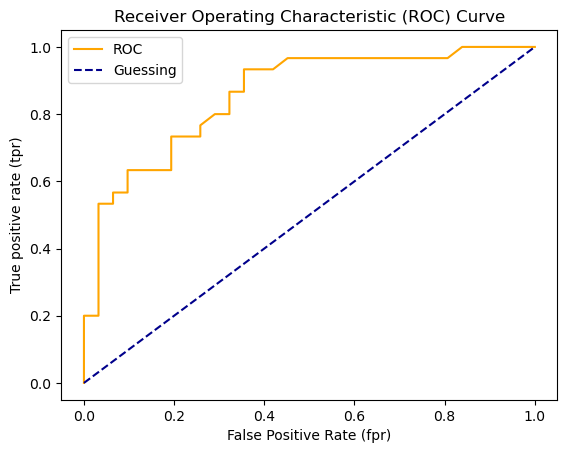

In [20]:
plot_roc_curve(fpr, tpr)

In [21]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8564516129032257

In a nutshell, what you should remember is:

* ROC curves and AUC metrics are evaluation metrics for binary classification models (a model which predicts one thing or another, such as heart disease or not).

* The ROC curve compares the true positive rate (tpr) versus the false positive rate (fpr) at different classification thresholds.

* The AUC metric tells you how well your model is at choosing between classes (for example, how well it is at deciding whether someone has heart disease or not). A perfect model will get an AUC score of 1.

Further reading:

* [Video](https://www.youtube.com/watch?v=4jRBRDbJemM)
* [ROC docs](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)
* [Google ML course](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)

**Confusion matrix**

A comparison of the the actual labels vs the predicted labels

![matrix](matrix.png)

In [22]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

conf_mat = confusion_matrix(y_test, y_preds)

conf_mat

array([[22,  9],
       [ 6, 24]], dtype=int64)

In [24]:
pd.crosstab(y_test, 
            y_preds,
           rownames=["Actual labels"],
           colnames=["Predicted labels"])

Predicted labels,0,1
Actual labels,,
0,22,9
1,6,24


In [25]:
import sklearn

sklearn.__version__

'1.1.3'

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay

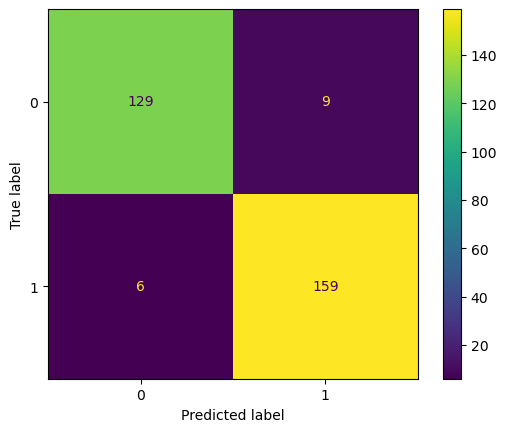

In [28]:
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

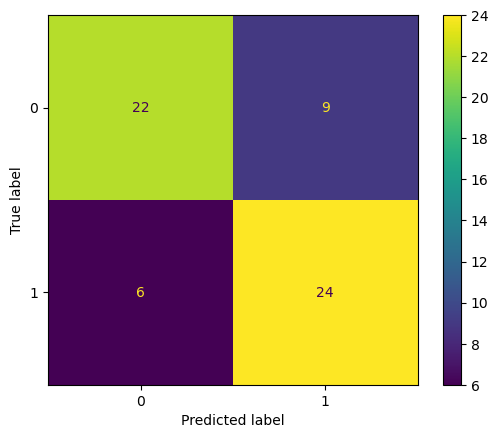

In [30]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds);

**classification report**

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75        31
           1       0.73      0.80      0.76        30

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



**Anatomy of a report**

* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

**Summary**
- Accuracy - is a good measuer to start with if all classes are balanced (e.g. same amount of samples which are labelled 0 or 1)
- Precision and Recall become more important when classes are imbalanced
- If false positive predictions are worse than false negatives, aim for higher precision
- If false negative predictions are worse than false positives, aim for higher recall
- F1-score - is a combination of precision and recall

**Evaluation metrics for regression models**

[Docs](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) 

1. R^2 (r-squared) or coefficient of determination
2. Mean absolute error(MAE)
3. Mean squared error (MSE)

What R-squared does: Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. If all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers, its R^2 value would be 1

In [33]:
# prepare a regression problem

from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [34]:
from sklearn.model_selection import train_test_split

X = data["data"]
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8154575773443913

the default value for score is r-squared which would be the same as using the r2_score() method from metrics

In [36]:
from sklearn.metrics import r2_score

y_preds = model.predict(X_test)

r2_score(y_true=y_test, y_pred=y_preds)

0.8154575773443913

**Mean absolute error (MAE)**

It is the averge of the absolute differences between predictions and actual values

It gives you an idea of how wrong your model predictions are

In [37]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_true=y_test, y_pred=y_preds)

0.32552568304263585

In [38]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_true=y_test, y_pred=y_preds)

0.24691313854135047

**using the `scoring` parameter for classification problems**

In [5]:
import pandas as pd
import numpy as np

np.random.seed(42)

heart_disease_df = pd.read_csv("heart-disease.csv")

X = heart_disease_df.drop("target", axis=1)
y = heart_disease_df["target"]

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [8]:
np.random.seed(42)

clf = RandomForestClassifier()

scores = cross_val_score(clf, X, y)

scores

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [10]:
np.random.seed(42)

precision_scores = cross_val_score(clf, X, y, scoring="precision")

precision_scores

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [12]:
np.random.seed(42)

recall_scores = cross_val_score(clf, X, y, scoring="recall")

recall_scores

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

**using the `scoring` parameter for regression problems**

In [14]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

X = data["data"]
y = data["target"]

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [19]:
model = RandomForestRegressor()

mae_scores = cross_val_score(model, X, y, scoring="neg_mean_absolute_error")

mae_scores

array([-0.53895506, -0.4118183 , -0.43888317, -0.464205  , -0.47454934])

**using evaluation metrics from scikit learn's built in methods**

They are found under `sklearn.metrics` module
- For classification problems: `accuracy_score`, `precision_score`, `recall_score` etc

- For regression problems: `r2_score`, `mean_absolute_error`, `mean_squared_error` etc

[Docs](https://scikit-learn.org/stable/modules/model_evaluation.html)

## Improving a model

- First model = baseline model
- First predictions = baseline predictions

From a data perspective
* Get more data
* Improve the data e.g add more features

From a model perspective
* Use a better ML algo
* Tune the current model

Parameters = model finds these patterns in data
Hyperparameters = settings on a model that you can adjust to potentailly improve its ability to find patterns

Three ways to adjust hyperparameters
1. By hand
2. Randomly with `RandomSearchCV`
3. Exhaustively with `GridSearchCV`

In [1]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# view hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Tuning hyperparameters by hand

We need to create a train, validation and test set

We will try and use some recommended hyperparameters mentioned in the docs
1. `max_depth`
2. `max_features`
3. `min_sample_leaf`
4. `min_sample_split`
5. `n_estimators`

In [1]:
# lets create a fn for evaluating the model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_preds(y_true, y_preds):
    """
    For classification problems
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    
    metrics_dict = {
        "accuracy": round(accuracy, 2),
        "precision":  round(precision, 2),
        "recall":  round(recall, 2),
        "f1":  round(f1, 2),
    }
    
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}%")
    print(f"Recall: {recall:.2f}%")
    print(f"F1: {f1:.2f}%")
    
    return metrics_dict

In [14]:
# shuffle the data
heart_disease_df = heart_disease_df.sample(frac=1)

heart_disease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
127,67,0,2,152,277,0,1,172,0,0.0,2,1,2,1
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3,1


In [13]:
# Split into X and y
X = heart_disease_df.drop("target", axis=1)
y = heart_disease_df["target"]


# 70% for training, 15% for validation, 15% for test

train_split_idx_last = round(0.7 * len(heart_disease_df))
validation_split_idx_last = round(train_split_idx_last + (0.15 * len(heart_disease_df)))

X_train, y_train = X.iloc[:train_split_idx_last], y.iloc[:train_split_idx_last]
X_valid, y_valid = X.iloc[train_split_idx_last:validation_split_idx_last], y.iloc[train_split_idx_last:validation_split_idx_last]
X_test, y_test = X.iloc[validation_split_idx_last:], y.iloc[validation_split_idx_last:]

(212, 45, 46)

In [32]:
import numpy as np

np.random.seed(42)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

# make predictions using validation set
y_preds = clf.predict(X_valid)

# evaluate model on validation set
scores = evaluate_preds(y_valid, y_preds)

scores

Accuracy: 86.67%
Precision: 0.96%
Recall: 0.81%
F1: 0.88%


{'accuracy': 0.87, 'precision': 0.96, 'recall': 0.81, 'f1': 0.88}

In [39]:
np.random.seed(42)

# create another model with different hyperparameters
clf_2 = RandomForestClassifier(min_samples_leaf=20)

clf_2.fit(X_train, y_train)

y_preds_2 = clf_2.predict(X_valid)

scores_2 = evaluate_preds(y_valid, y_preds_2)

scores_2

Accuracy: 88.89%
Precision: 0.96%
Recall: 0.85%
F1: 0.90%


{'accuracy': 0.89, 'precision': 0.96, 'recall': 0.85, 'f1': 0.9}

### Tuning hyperparameters using RandomizedSearchCV

In [101]:
# create a dict of the hyperparameters we want to experiment with
grid = {
    "n_estimators": [10, 100, 200, 500, 1000, 1200],
    "max_depth": [None, 5, 10, 20, 30],
    "max_features": ["auto", "sqrt"],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 4]
}

In [102]:
# shuffle the data
heart_disease_df = heart_disease_df.sample(frac=1)

# Split into X and y
X = heart_disease_df.drop("target", axis=1)
y = heart_disease_df["target"]

# create train, test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [103]:
# Initiate Classifier
clf = RandomForestClassifier()

In [104]:
# Create a randomized classifier
from sklearn.model_selection import RandomizedSearchCV

In [109]:
np.random.seed(42)

rs_clf = RandomizedSearchCV(estimator=clf, 
                            param_distributions=grid, 
                            n_iter=10, 
                            cv=5, 
                            verbose=2)

In [110]:
# fit the randomized version of clf using training set. 
# 5 fold cross validation will be applied to the training set

rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\St3vA\Dev\Learning\python\MachineLearning#ZTM\workspace\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s


C:\Users\St3vA\Dev\Learning\python\MachineLearning#ZTM\workspace\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s


C:\Users\St3vA\Dev\Learning\python\MachineLearning#ZTM\workspace\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s


C:\Users\St3vA\Dev\Learning\python\MachineLearning#ZTM\workspace\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s


C:\Users\St3vA\Dev\Learning\python\MachineLearning#ZTM\workspace\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.4s
[CV] END max_depth=30, max_f

C:\Users\St3vA\Dev\Learning\python\MachineLearning#ZTM\workspace\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s


C:\Users\St3vA\Dev\Learning\python\MachineLearning#ZTM\workspace\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s


C:\Users\St3vA\Dev\Learning\python\MachineLearning#ZTM\workspace\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s


C:\Users\St3vA\Dev\Learning\python\MachineLearning#ZTM\workspace\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s


C:\Users\St3vA\Dev\Learning\python\MachineLearning#ZTM\workspace\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   3.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   3.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   3.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   3.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   3.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   1.3s
[CV] END max_depth=10, ma

C:\Users\St3vA\Dev\Learning\python\MachineLearning#ZTM\workspace\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\St3vA\Dev\Learning\python\MachineLearning#ZTM\workspace\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\St3vA\Dev\Learning\python\MachineLearning#ZTM\workspace\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   3.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   3.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   3.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   3.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   3.4s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [111]:
# Find the best hyperparameters found by RandomizedSearchCV
rs_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

Now when we call `predict()` on `rs_clf` (our RandomizedSearchCV version of our classifier), it'll use the best hyperparameters it found.

In [112]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy: 83.61%
Precision: 0.88%
Recall: 0.88%
F1: 0.88%


### using GridSearchCV

It tries all the given parameter options as opposed to picking random combinations

In [4]:
import pandas as pd

heart_disease_df = pd.read_csv("heart-disease.csv")

# shuffle the data
heart_disease_df = heart_disease_df.sample(frac=1)

# Split into X and y
X = heart_disease_df.drop("target", axis=1)
y = heart_disease_df["target"]

# create train, test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

grid_2 = {
    "n_estimators": [200, 500],
    "max_depth": [None],
    "max_features": ["sqrt"],
    "min_samples_split": [6],
    "min_samples_leaf": [1, 2]
}

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

np.random.seed(42)

clf = RandomForestClassifier()

gs_clf = GridSearchCV(estimator=clf,
                     param_grid=grid_2,
                     cv=5,
                     verbose=2)

gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [200, 500]},
             verbose=2)

In [10]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 200}

In [11]:
y_preds = gs_clf.predict(X_test)

scores = evaluate_preds(y_test, y_preds)

scores

Accuracy: 83.61%
Precision: 0.88%
Recall: 0.83%
F1: 0.85%


{'accuracy': 0.84, 'precision': 0.88, 'recall': 0.83, 'f1': 0.85}

## Saving and Loading a model

2 ways:
1. `pickle` module
2. `joblib` module

According to scikit-learn docs, it is better to use joblib when persisting larger models. [Read more](https://scikit-learn.org/stable/model_persistence.html)

In [13]:
import pickle

pickle.dump(gs_clf, open("gs_clf.pkl", "wb"))

In [14]:
loaded_gs_clf = pickle.load(open("gs_clf.pkl", "rb"))

y_preds = loaded_gs_clf.predict(X_test)

evaluate_preds(y_test, y_preds)

Accuracy: 83.61%
Precision: 0.88%
Recall: 0.83%
F1: 0.85%


{'accuracy': 0.84, 'precision': 0.88, 'recall': 0.83, 'f1': 0.85}

**using joblib**

In [15]:
from joblib import load, dump

dump(gs_clf, filename="gs_clf.joblib")

['gs_clf.joblib']

In [16]:
loaded_model = load("gs_clf.joblib")

loaded_model.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 200}

## Putting it all togethor

We are going to use **Pipelines** [Docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)

In [18]:
df = pd.read_csv("car-sales-extended-missing-data.csv")
df.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [19]:
df.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [20]:
df.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


Steps we want to do (all in one cell):

1. Fill missing data
2. COnvert data into numbers
3. Build a model on the data
    


In [22]:
# for data prep
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# for modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# setup random seed
import numpy as np
np.random.seed(42)

# import data and drop rows with missing labels/targets
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset="Price", inplace=True)

# Define differnent features and transformer pipelines
cat_features = ["Make", "Colour"]
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

num_features = ["Odometer (KM)"]
num_tranformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# setup preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ("cat", cat_transformer, cat_features),
    ("door", door_transformer, door_feature),
    ("num", num_tranformer, num_features)
])


# create a preprocessing and modeling pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor())
])

# split data
X = data.drop("Price",  axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

we can also use `RandomSearchCV` or `GridSearchCV` togethor with pipelines



In [26]:
from sklearn.model_selection import GridSearchCV

"""
we name the hyper parameters differently. we use the names of the pipeline steps
we use above to access the attributes we want to provide options for
"""
grid_params = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(estimator=model,
                       param_grid=grid_params,
                       cv=5,
                       verbose=2)

gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=None, model__min_samples_spli

[CV] END model__max_depth=5, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.5s
[CV] END model__max_depth=5, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.6s
[CV] END model__max_depth=5, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.6s
[CV] END model__max_depth=5, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.7s
[CV] END model__max_depth=5, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean;

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [27]:
gs_model.score(X_test, y_test)

0.3350273243313292

In [28]:
gs_model.best_params_

{'model__max_depth': 5,
 'model__min_samples_split': 2,
 'model__n_estimators': 1000,
 'preprocessor__num__imputer__strategy': 'mean'}

In [29]:
gs_model.best_score_

0.3171870403348786